In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Load the Dataset

In [64]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\t_dataset.csv', index_col=False)

In [65]:
df

,Tweet,Sarcasm,word_tokens,char_tokens,sentence_tokens,subword_tokens,lemmatized_tweet
0,Fantastic service yet again from EE. 1st you u...,yes,"['Fantastic', 'service', 'yet', 'again', 'from...","['F', 'a', 'n', 't', 'a', 's', 't', 'i', 'c', ...","['Fantastic service yet again from EE.', '1st ...","['fantastic', 'service', 'yet', 'again', 'from...",Fantastic service yet again from EE . 1st you ...
1,Not sure if that was or. I will take it! face_...,yes,"['Not', 'sure', 'if', 'that', 'was', 'or.', 'I...","['N', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', ...","['Not sure if that was or.', 'I will take it!'...","['not', 'sure', 'if', 'that', 'was', 'or', '.'...",Not sure if that wa or . I will take it ! face...
2,Barely 9 am and already shaking with rage.,yes,"['Barely', '9', 'am', 'and', 'already', 'shaki...","['B', 'a', 'r', 'e', 'l', 'y', ' ', '9', ' ', ...",['Barely 9 am and already shaking with rage.'],"['barely', '9', 'am', 'and', 'already', 'shaki...",Barely 9 am and already shaking with rage .
3,I guess that proves it then. Black folks have ...,yes,"['I', 'guess', 'that', 'proves', 'it', 'then.'...","['I', ' ', 'g', 'u', 'e', 's', 's', ' ', 't', ...","['I guess that proves it then.', 'Black folks ...","['i', 'guess', 'that', 'proves', 'it', 'then',...",I guess that prof it then . Black folk have no...
4,Does this tweet need a tag,yes,"['Does', 'this', 'tweet', 'need', 'a', 'tag']","['D', 'o', 'e', 's', ' ', 't', 'h', 'i', 's', ...",['Does this tweet need a tag'],"['does', 'this', 't', '##wee', '##t', 'need', ...",Does this tweet need a tag
...,...,...,...,...,...,...,...
2976,Sometimes truth is glaring you in the face bl...,no,"['Sometimes', 'truth', 'is', 'glaring', 'you',...","['S', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ...","[""Sometimes truth is glaring you in the face ...","['sometimes', 'truth', 'is', 'glaring', 'you',...",Sometimes truth is glaring you in the face bli...
2977,I just love not hanging out with my boyfriend .,no,"['I', 'just', 'love', 'not', 'hanging', 'out',...","['I', ' ', 'j', 'u', 's', 't', ' ', 'l', 'o', ...",['I just love not hanging out with my boyfrien...,"['i', 'just', 'love', 'not', 'hanging', 'out',...",I just love not hanging out with my boyfriend .
2978,There is this 1 quince picture I have that I'm...,no,"['There', 'is', 'this', '1', 'quince', 'pictur...","['T', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', ...","[""There is this 1 quince picture I have that I...","['there', 'is', 'this', '1', 'qui', '##nce', '...",There is this 1 quince picture I have that I '...
2979,I feel so ill at the moment that I cant speak ...,no,"['I', 'feel', 'so', 'ill', 'at', 'the', 'momen...","['I', ' ', 'f', 'e', 'e', 'l', ' ', 's', 'o', ...","[""I feel so ill at the moment that I cant spea...","['i', 'feel', 'so', 'ill', 'at', 'the', 'momen...",I feel so ill at the moment that I cant speak ...


### Converting Sarcasm Labels to Binary Values

In [66]:
df['Sarcasm'] = df['Sarcasm'].map({'yes': 1, 'no': 0})

### Splitting Data into Training and Testing Sets

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sarcasm'], test_size=0.2, random_state=42)

### Creating TF-IDF Vectors for Text Data

In [68]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [69]:
df

,Tweet,Sarcasm,word_tokens,char_tokens,sentence_tokens,subword_tokens,lemmatized_tweet
0,Fantastic service yet again from EE. 1st you u...,1,"['Fantastic', 'service', 'yet', 'again', 'from...","['F', 'a', 'n', 't', 'a', 's', 't', 'i', 'c', ...","['Fantastic service yet again from EE.', '1st ...","['fantastic', 'service', 'yet', 'again', 'from...",Fantastic service yet again from EE . 1st you ...
1,Not sure if that was or. I will take it! face_...,1,"['Not', 'sure', 'if', 'that', 'was', 'or.', 'I...","['N', 'o', 't', ' ', 's', 'u', 'r', 'e', ' ', ...","['Not sure if that was or.', 'I will take it!'...","['not', 'sure', 'if', 'that', 'was', 'or', '.'...",Not sure if that wa or . I will take it ! face...
2,Barely 9 am and already shaking with rage.,1,"['Barely', '9', 'am', 'and', 'already', 'shaki...","['B', 'a', 'r', 'e', 'l', 'y', ' ', '9', ' ', ...",['Barely 9 am and already shaking with rage.'],"['barely', '9', 'am', 'and', 'already', 'shaki...",Barely 9 am and already shaking with rage .
3,I guess that proves it then. Black folks have ...,1,"['I', 'guess', 'that', 'proves', 'it', 'then.'...","['I', ' ', 'g', 'u', 'e', 's', 's', ' ', 't', ...","['I guess that proves it then.', 'Black folks ...","['i', 'guess', 'that', 'proves', 'it', 'then',...",I guess that prof it then . Black folk have no...
4,Does this tweet need a tag,1,"['Does', 'this', 'tweet', 'need', 'a', 'tag']","['D', 'o', 'e', 's', ' ', 't', 'h', 'i', 's', ...",['Does this tweet need a tag'],"['does', 'this', 't', '##wee', '##t', 'need', ...",Does this tweet need a tag
...,...,...,...,...,...,...,...
2976,Sometimes truth is glaring you in the face bl...,0,"['Sometimes', 'truth', 'is', 'glaring', 'you',...","['S', 'o', 'm', 'e', 't', 'i', 'm', 'e', 's', ...","[""Sometimes truth is glaring you in the face ...","['sometimes', 'truth', 'is', 'glaring', 'you',...",Sometimes truth is glaring you in the face bli...
2977,I just love not hanging out with my boyfriend .,0,"['I', 'just', 'love', 'not', 'hanging', 'out',...","['I', ' ', 'j', 'u', 's', 't', ' ', 'l', 'o', ...",['I just love not hanging out with my boyfrien...,"['i', 'just', 'love', 'not', 'hanging', 'out',...",I just love not hanging out with my boyfriend .
2978,There is this 1 quince picture I have that I'm...,0,"['There', 'is', 'this', '1', 'quince', 'pictur...","['T', 'h', 'e', 'r', 'e', ' ', 'i', 's', ' ', ...","[""There is this 1 quince picture I have that I...","['there', 'is', 'this', '1', 'qui', '##nce', '...",There is this 1 quince picture I have that I '...
2979,I feel so ill at the moment that I cant speak ...,0,"['I', 'feel', 'so', 'ill', 'at', 'the', 'momen...","['I', ' ', 'f', 'e', 'e', 'l', ' ', 's', 'o', ...","[""I feel so ill at the moment that I cant spea...","['i', 'feel', 'so', 'ill', 'at', 'the', 'momen...",I feel so ill at the moment that I cant speak ...


### Function for Model Evaluation

In [70]:
def evaluate_model(y_test, y_pred, y_pred_prob):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression

In [71]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

Accuracy: 77.89%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69       250
           1       0.76      0.91      0.83       347

    accuracy                           0.78       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.79      0.78      0.77       597



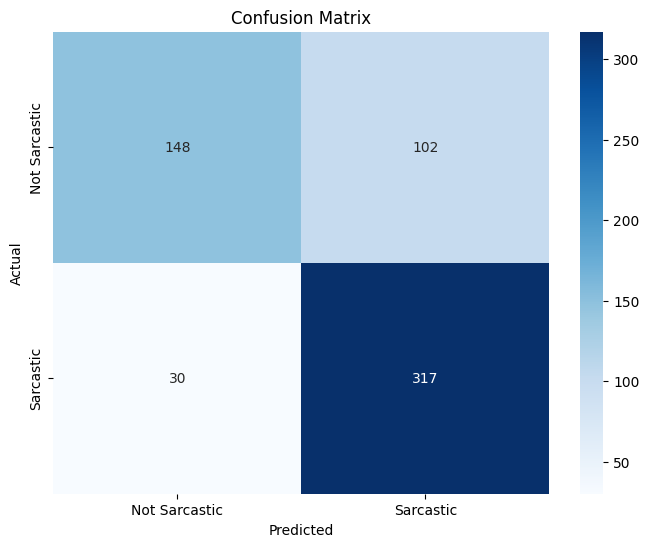

In [72]:
evaluate_model(y_test, y_pred, y_pred_prob)

## SVM (Support Vector Machine) model

In [73]:
# Train SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 77.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       250
           1       0.76      0.90      0.82       347

    accuracy                           0.78       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.78      0.78      0.77       597



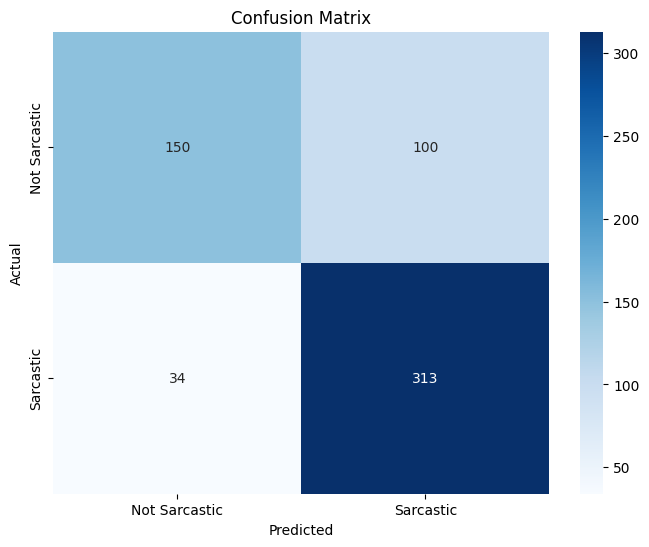

In [74]:
evaluate_model(y_test, y_pred, y_pred_prob)

## Naive Bayes model

In [75]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 78.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       250
           1       0.76      0.91      0.83       347

    accuracy                           0.78       597
   macro avg       0.80      0.76      0.76       597
weighted avg       0.79      0.78      0.77       597



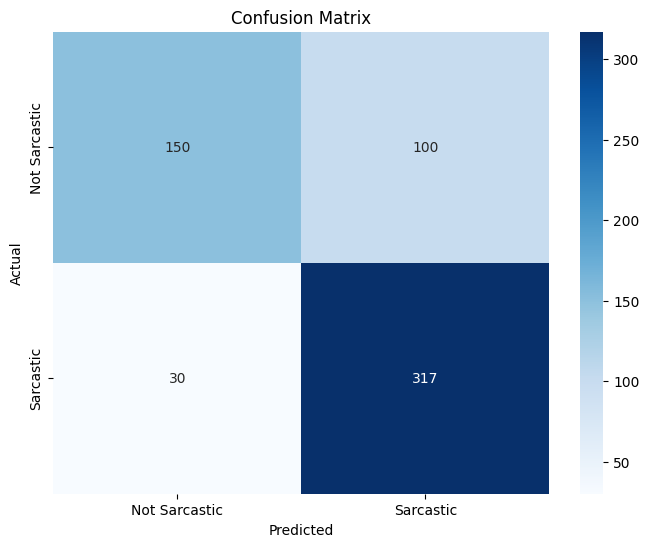

In [76]:
evaluate_model(y_test, y_pred, y_pred_prob)

In [77]:
## Decision Tree model

In [78]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 76.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       250
           1       0.81      0.79      0.80       347

    accuracy                           0.77       597
   macro avg       0.76      0.76      0.76       597
weighted avg       0.77      0.77      0.77       597



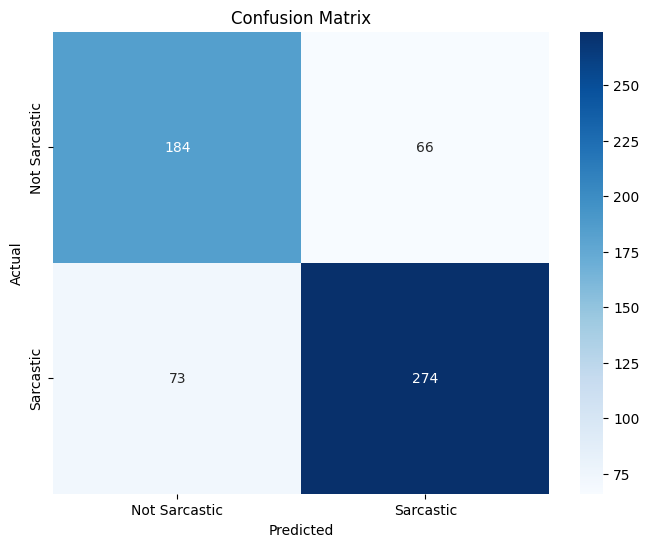

In [79]:
evaluate_model(y_test, y_pred, y_pred_prob)

## K-Nearest Neighbors (KNN) model

In [80]:
# Train KNN model
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 43.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60       250
           1       0.92      0.03      0.06       347

    accuracy                           0.44       597
   macro avg       0.67      0.51      0.33       597
weighted avg       0.71      0.44      0.29       597



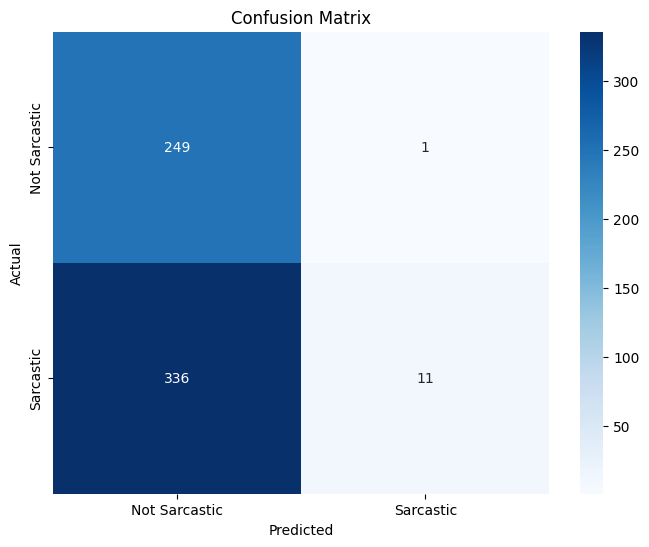

In [81]:
evaluate_model(y_test, y_pred, y_pred_prob)